[2]


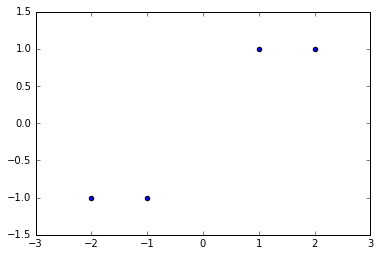

[0 1 2 3]


In [3]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 

print(clf.predict([[-0.8, 2]]))

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(*zip(*X))
plt.show()

print clf.support_

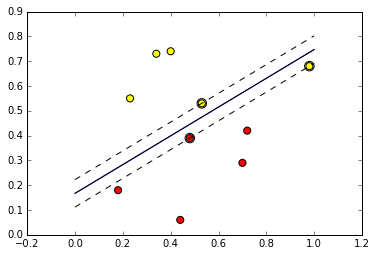

In [4]:
import pandas as pd
from sklearn.svm import SVC
data = pd.read_csv('svm-data.csv', header = None)
y = data[0]
X = data[[1, 2]]

clf = SVC(C=100000, kernel='linear', random_state=241)
clf.fit(X, y)
ans = ",".join(str(x) for x in clf.support_ + 1)
with open('q1.txt', 'w') as f:
    f.write(ans)
f.close()

# plt.scatter(X[[1]], X[[2]], c = ('red', 'yellow' ), s = 30)
w = clf.coef_[0]   # Weights assigned to the features 
a = - w[0] / w[1]
xx = np.linspace(0,1)
yy = a * xx - (clf.intercept_[0]) / w[1]   # intercept_ - Constants in decision function.

b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
plt.plot(xx, yy, label="non weighted div")
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
# plt.legend()
# plt.show()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=90, facecolors='none')
plt.scatter(X[[1]], X[[2]],c = ('red', 'yellow' ), s = 50)

plt.show()

In [5]:
#!/usr/bin/env python -W ignore::DeprecationWarning
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV

newsgroups = datasets.fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])
# print len(newsgroups.target)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data).toarray()
y = newsgroups.target

feature_mapping = vectorizer.get_feature_names()    # transform training data
# print feature_mapping

In [7]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}    # grid for parameters 
cv = KFold(y.size, n_folds=5, shuffle=True, random_state=241)    # cross-validation
clf = SVC(kernel='linear', random_state=241)    # support vector classifier

gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=1786, n_folds=5, shuffle=True, random_state=241),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [39]:
for a in gs.grid_scores_:
#     print 'a.mean_validation_score', a.mean_validation_score    # оценка качества по кросс-валидации
#     print 'a.parameters', a.parameters    # значения параметров
    print a

opt_clf = SVC(gs.best_estimator_.C, kernel='linear', random_state=241)
opt_clf.fit(X, y)
opt_weight = opt_clf.coef_

mean: 0.55263, std: 0.02812, params: {'C': 1.0000000000000001e-05}
mean: 0.55263, std: 0.02812, params: {'C': 0.0001}
mean: 0.55263, std: 0.02812, params: {'C': 0.001}
mean: 0.55263, std: 0.02812, params: {'C': 0.01}
mean: 0.95017, std: 0.00822, params: {'C': 0.10000000000000001}
mean: 0.99328, std: 0.00455, params: {'C': 1.0}
mean: 0.99328, std: 0.00455, params: {'C': 10.0}
mean: 0.99328, std: 0.00455, params: {'C': 100.0}
mean: 0.99328, std: 0.00455, params: {'C': 1000.0}
mean: 0.99328, std: 0.00455, params: {'C': 10000.0}
mean: 0.99328, std: 0.00455, params: {'C': 100000.0}


In [78]:
abs_opt_weight = np.abs(opt_weight[0])
sorted_abs_opt_weight = np.argsort(abs_opt_weight)[-10:]    # sort weigths, return indexes of that weights!
sorted_abs_opt_weight = sorted_abs_opt_weight[::-1]

feature_mapping = vectorizer.get_feature_names()    # to know which word corresponds to the i-th feature
ans = np.sort(np.array(feature_mapping)[sorted_abs_opt_weight])
print ' '.join(ans)

with open('q2.txt', 'w') as f:
    f.write(' '.join(ans))

atheism atheists bible god keith moon religion sci sky space
